# CCA for TUH source localised data representations

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def plot_pwcca_scores(all_data, colors=None, show_train=True, show_test=True, show_ci=True, legend_params = None):
    """
    Plots PWCCA scores across layers for different frequency bands with optional confidence intervals.

    Parameters:
    - all_data (dict): Dictionary containing PWCCA results for different frequency bands.
    - colors (list, optional): List of colors for plotting different frequency bands. Defaults to predefined colors.
    - show_train (bool): Whether to plot training PWCCA scores.
    - show_test (bool): Whether to plot testing PWCCA scores.
    - show_ci (bool): Whether to display confidence intervals.
    """

    if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'grey']  # Default colors

    plt.figure(figsize=(10, 6))

    for key, color in zip(all_data.keys(), colors):
        cca_results = all_data[key]
        # layers = np.arange(len(cca_results))  # Layer indices
        layers = np.arange(1, len(cca_results) + 1)  


        if key == 'baseline':
            color = 'grey'

        if show_train:
            pwcca_scores_train = np.array([np.mean(cca_results[layer]['pwcca_train']) for layer in cca_results.keys()])
            plt.plot(layers, pwcca_scores_train, 'o:', color=color, alpha=0.5, label=f"{key}_train")  # Dotted line
            plt.scatter(layers, pwcca_scores_train, color=color, zorder=3)  # Points without label

            if show_ci:
                ci_lower_train = np.array([np.quantile(cca_results[layer]['pwcca_train'], 0.025) for layer in cca_results.keys()])
                ci_upper_train = np.array([np.quantile(cca_results[layer]['pwcca_train'], 0.975) for layer in cca_results.keys()])
                plt.fill_between(layers, ci_lower_train, ci_upper_train, color=color, alpha=0.2)

        if show_test:
            pwcca_scores_test = np.array([np.mean(cca_results[layer]['pwcca_test']) for layer in cca_results.keys()])
            plt.plot(layers, pwcca_scores_test, 'o-', color=color, alpha=0.5, label=f"{key}_test")  # _test
            plt.scatter(layers, pwcca_scores_test, color=color, zorder=3)  # Points without label

            if show_ci:
                ci_lower_test = np.array([np.quantile(cca_results[layer]['pwcca_test'], 0.025) for layer in cca_results.keys()])
                ci_upper_test = np.array([np.quantile(cca_results[layer]['pwcca_test'], 0.975) for layer in cca_results.keys()])
                plt.fill_between(layers, ci_lower_test, ci_upper_test, color=color, alpha=0.2)

    if legend_params is not None:
        plt.legend(**legend_params) # , fontsize=14
    else:
        plt.legend () # loc='lower center', bbox_to_anchor=(0.8, 0.2)

    plt.xlabel("Model layer number", fontsize=14)
    plt.ylabel("PWCCA Score", fontsize=14)

    plt.xticks(layers, np.arange(1, len(layers) + 1), fontsize=12)  # Show all tick labels from 1 to N
    plt.grid(False)  # Disable default grid
    plt.xticks(layers, np.arange(1, len(layers) + 1))  # Show all tick labels from 1 to N
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)  # Faint horizontal grid lines
    # Add faint vertical grid only for every second tick
    for i, tick in enumerate(layers):
        if i % 2 == 1:  
            plt.axvline(tick, color='gray', linestyle='--', alpha=0.2, linewidth=0.8)  # Lower alpha for subtle effect

    plt.yticks(fontsize=12)


    plt.show()


colors4 = [ '#590e81', '#119350',  '#E2125F', '#3974ff',  '#FFA200',  '#a31b00',       ]
colors1 = [ '#a31b00', '#E2125F', '#590e81', '#119350',  '#FFA200',  '#3974ff',          ]

cols = colors4

### compare cca of train and test:

In [ ]:
cca_train_test = {paths*}

all_data = {}
for key in cca_train_test.keys():
    with open(cca_train_test[key], 'rb') as f:
        cca_results = pickle.load(f)
    all_data[key] = cca_results

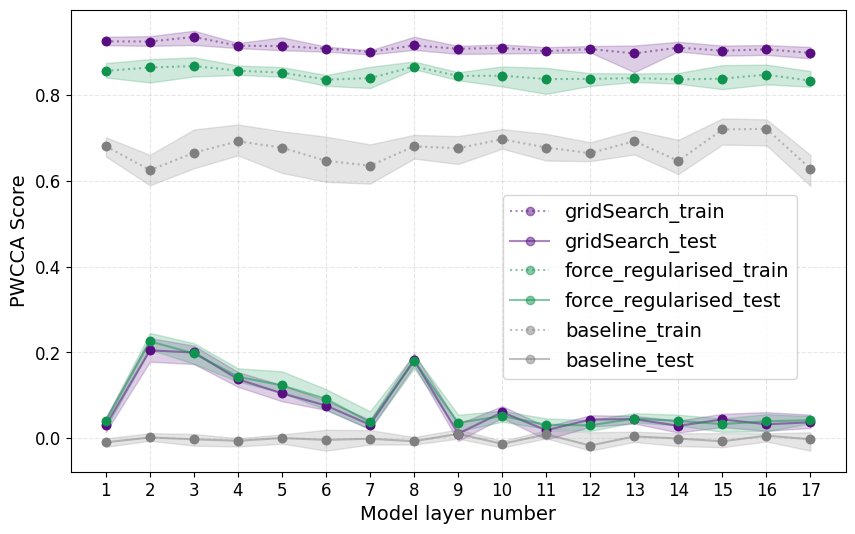

In [89]:
plot_pwcca_scores(all_data, colors=colors4, show_train=True, show_test=True, show_ci=True, legend_params={'loc': 'center right', 'bbox_to_anchor':(0.95, 0.4,), 'fontsize': 14})

### PWCCA normalized test

In [ ]:
cca_anatomical = {paths*}

all_data = {}
for key in cca_anatomical.keys():
    with open(cca_anatomical[key], 'rb') as f:
        cca_results = np.load(f, allow_pickle=True)
    all_data[key] = cca_results


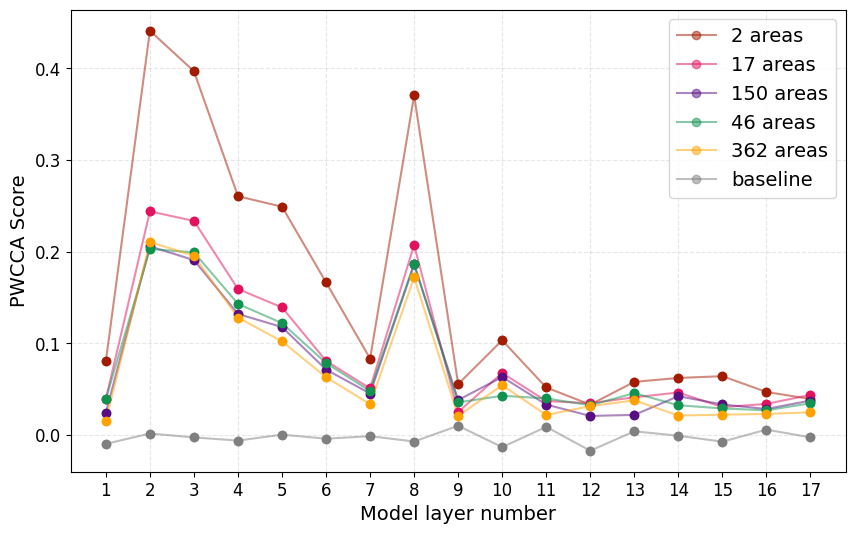

In [73]:
plot_pwcca_scores(all_data, colors=colors1, show_train=False, show_test=True, show_ci=False, legend_params={'fontsize': 14})

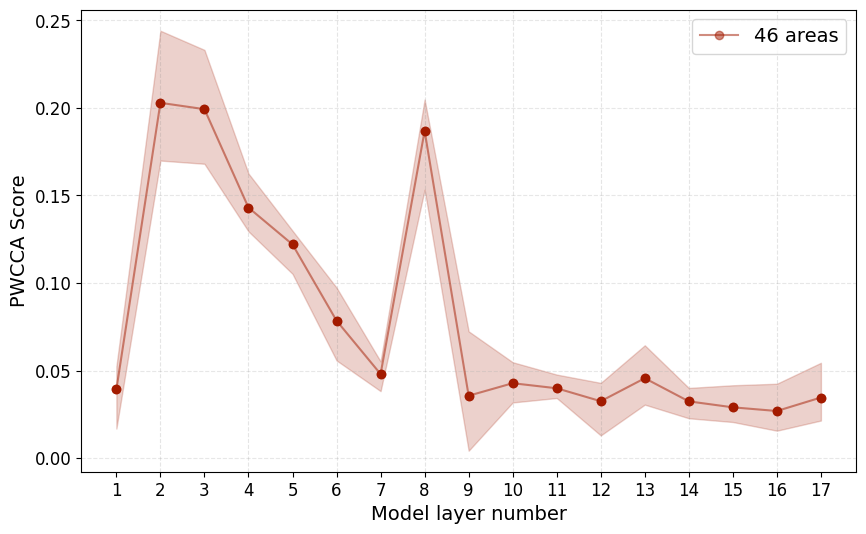

In [79]:
plot_pwcca_scores({'46 areas':all_data['46 areas']}, colors=colors1, show_train=False, show_test=True, show_ci=True, legend_params={'fontsize': 14})

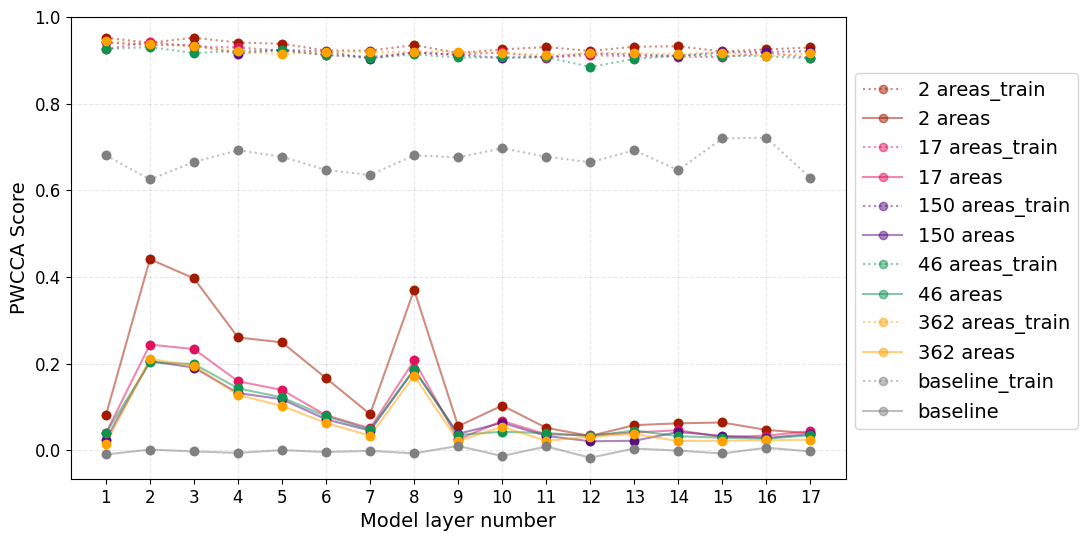

In [83]:
plot_pwcca_scores(all_data, colors=colors1, show_train=True, show_test=True, show_ci=False, legend_params={'fontsize': 14, 'bbox_to_anchor':(1, 0.9,)})

### Plot label distributions on the brain


In [ ]:
anatomical_labels = {paths*}

all_labels = {}
for key in anatomical_labels.keys():
    with open(anatomical_labels[key], 'rb') as f:
        cca_results = np.load(f, allow_pickle=True).item()
    all_labels[key] = cca_results

In [3]:
PALS_B12_Lobes = ['???-lh',
  'LOBE.FRONTAL-lh',
  'LOBE.LIMBIC-lh',
  'LOBE.OCCIPITAL-lh',
  'LOBE.PARIETAL-lh',
  'LOBE.TEMPORAL-lh',
  'MEDIAL.WALL-lh',
 '???-rh',
  '????-rh',
  '???????-rh',
  'GYRUS-rh',
  'LOBE.FRONTAL-rh',
  'LOBE.LIMBIC-rh',
  'LOBE.OCCIPITAL-rh',
  'LOBE.PARIETAL-rh',
  'LOBE.TEMPORAL-rh',
  'MEDIAL.WALL-rh']

area_color_dict = {
    '???-lh': 'gray',
    'LOBE.FRONTAL-lh': '#119350', 'LOBE.FRONTAL-rh': '#44c82d',
    'LOBE.LIMBIC-lh': '#3974ff', 'LOBE.LIMBIC-rh': '#2fb5f3' ,
    'LOBE.OCCIPITAL-lh': '#590e81', 'LOBE.OCCIPITAL-rh': '#9a36bf',
    'LOBE.PARIETAL-lh': '#E2125F', 'LOBE.PARIETAL-rh': '#ff5c8a',
    'LOBE.TEMPORAL-lh': '#a31b00', 'LOBE.TEMPORAL-rh': '#da3407',
    'MEDIAL.WALL-lh': '#FFA200', 'MEDIAL.WALL-rh': '#F0DA1A',
    '???-rh': 'gray', '????-rh': 'gray', '???????-rh': 'gray', 'GYRUS-rh': 'gray'
}

invalid_idx = [0, 7, 8, 9]


In [7]:
# split label to not include LOBE. :
[label.split('.')[1] if '.' in label else label for label in PALS_B12_Lobes]

['???-lh',
 'FRONTAL-lh',
 'LIMBIC-lh',
 'OCCIPITAL-lh',
 'PARIETAL-lh',
 'TEMPORAL-lh',
 'WALL-lh',
 '???-rh',
 '????-rh',
 '???????-rh',
 'GYRUS-rh',
 'FRONTAL-rh',
 'LIMBIC-rh',
 'OCCIPITAL-rh',
 'PARIETAL-rh',
 'TEMPORAL-rh',
 'WALL-rh']

In [12]:
loc17_labels = np.array([all_labels['loc17'][key]['power']['T0'][0] for key in all_labels['loc17'].keys()])

def plot_power_distributions(areas_power):
    plt.figure(figsize=(12, 6))
    plt.rcParams.update({'font.size': 14})  # Increase font size globally
    
    for i in range(areas_power.shape[1]):
        if i not in invalid_idx:
            label = PALS_B12_Lobes[i]
            sns.kdeplot(areas_power[:, i], label=f'Area {label.split(".")[-1]}', linewidth=1.5, color=area_color_dict[label])
    
    plt.xlabel("Power Values", fontsize=16)
    plt.ylabel("Density", fontsize=16)
    # plt.title("Power Distributions Across 17 Brain Areas", fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.legend(title="Areas", loc='upper right', fontsize=12, title_fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.xlim(-4e-21, 8e-21)
    plt.show()

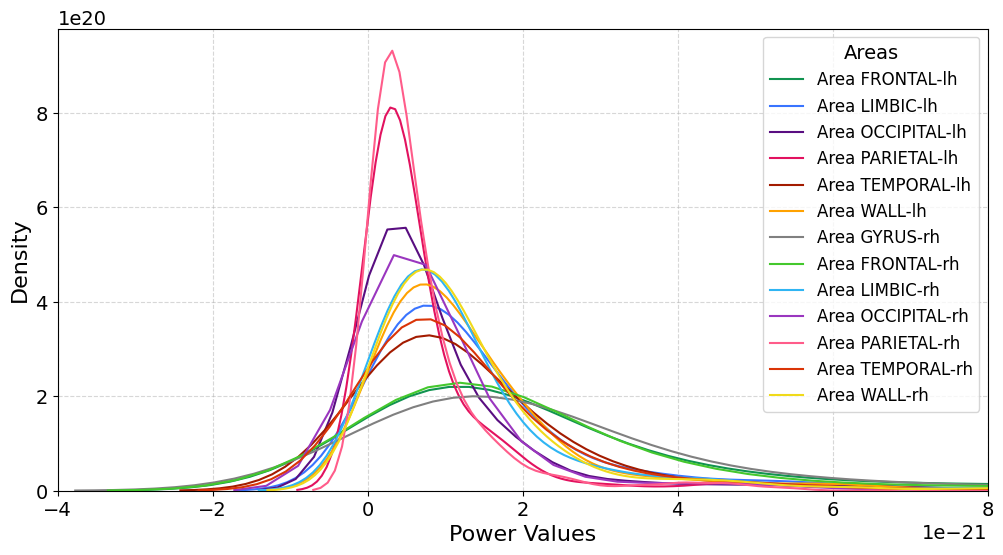

In [13]:
plot_power_distributions(loc17_labels)

### Freq plots

In [ ]:
cca_anatomical = {paths*}

all_data = {}
for key in cca_anatomical.keys():
    with open(cca_anatomical[key], 'rb') as f:
        cca_results = np.load(f, allow_pickle=True)
    all_data[key] = cca_results


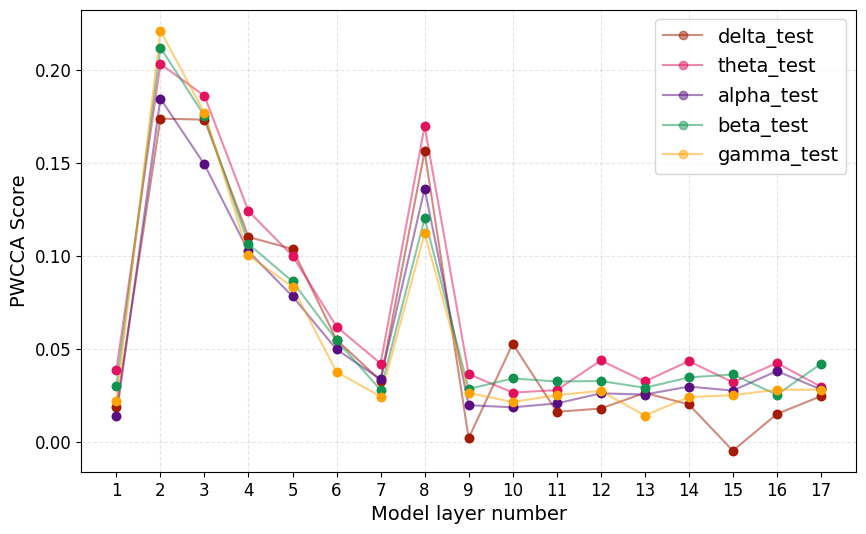

In [93]:
plot_pwcca_scores(all_data, colors=colors1, show_train=False, show_test=True, show_ci=False, legend_params={'fontsize': 14})

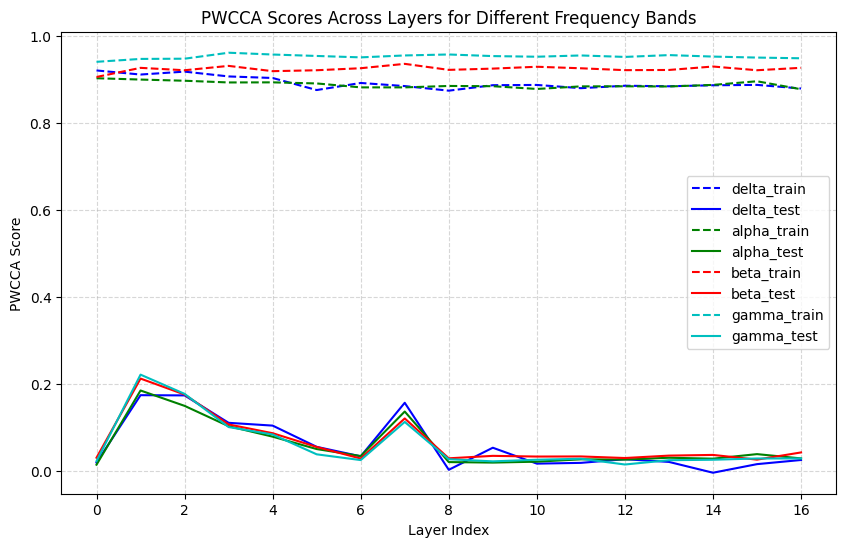

In [43]:
plot_pwcca_scores(all_data, colors=None, show_train=True, show_test=True, show_ci=False)

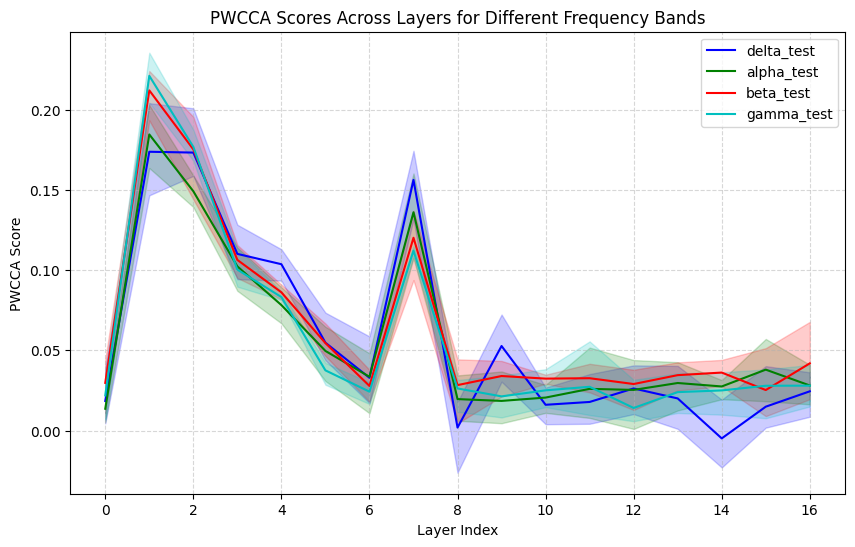

In [44]:
plot_pwcca_scores(all_data, colors=None, show_train=False, show_test=True, show_ci=True)

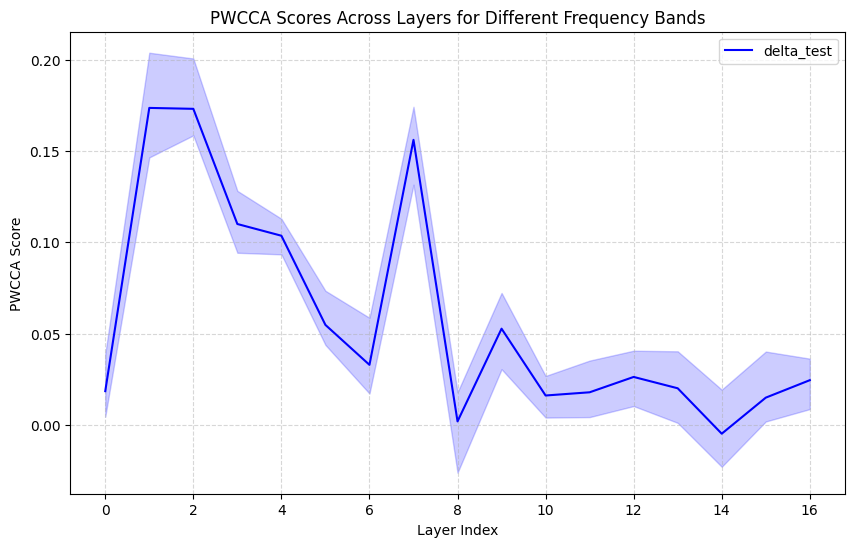

In [45]:
plot_pwcca_scores({'delta':all_data['delta']}, colors=None, show_train=False, show_test=True, show_ci=True) 

### Plot cca scores and ci for one layer? 


In [ ]:
# plot cca score instead of pwcca for one layer: 

loc46 = paths*

with open(loc46, 'rb') as f:
    cca_results = pickle.load(f)



In [97]:
def plot_cca_components(cca_results, data_key='cca_corrs_test'):
    """
    Plots the mean and standard deviation of canonical correlations across model layers.

    Parameters:
    cca_results (dict): Dictionary containing CCA correlation results for different layers.
    data_key (str): Key indicating whether to use 'cca_corrs_train' or 'cca_corrs_test'.
    """
    layers = list(cca_results.keys())  # Extract layer names
    means = []
    std_devs = []

    # Extract mean and standard deviation of canonical correlations for each layer
    for layer in layers:
        if data_key in cca_results[layer]:  # Ensure the key exists
            corrs = np.array(cca_results[layer][data_key])
            means.append(np.mean(corrs))
            std_devs.append(np.std(corrs))
        else:
            means.append(np.nan)
            std_devs.append(np.nan)

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.errorbar(range(len(layers)), means, yerr=std_devs, fmt='o-', capsize=4, capthick=1, label="Mean ± Std Dev")

    # Formatting
    ax.set_xticks(range(len(layers)))
    ax.set_xticklabels(layers, rotation=90)  # Rotate for readability
    ax.set_xlabel('Model Layer')
    ax.set_ylabel('Canonical Correlation')
    ax.set_title(f'Canonical Correlations Across Layers ({data_key})')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


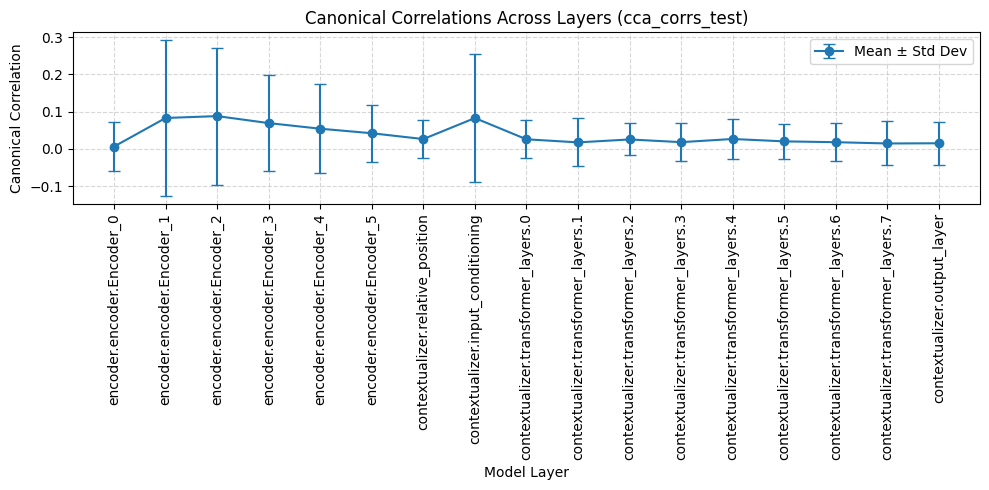

In [98]:
plot_cca_components(cca_results)

In [107]:
def plot_cca_components_for_layer(cca_results, layer_name, data_key='cca_corrs_test'):
    """
    Plots the canonical correlation components for a selected layer, including confidence intervals.

    Parameters:
    cca_results (dict): Dictionary containing CCA correlation results for different layers.
    layer_name (str): The specific layer to plot.
    data_key (str): Key indicating whether to use 'cca_corrs_train' or 'cca_corrs_test'.
    """
    if layer_name not in cca_results:
        raise ValueError(f"Layer '{layer_name}' not found in cca_results.")

    if data_key not in cca_results[layer_name]:
        raise ValueError(f"Key '{data_key}' not found in layer '{layer_name}'.")

    corrs = np.array(cca_results[layer_name][data_key])

    # Compute mean and confidence intervals (95% CI using quantiles)
    mean_vals = np.mean(corrs, axis=0)
    ci_lower = np.quantile(corrs, 0.025, axis=0)
    ci_upper = np.quantile(corrs, 0.975, axis=0)

    # Ensure x-axis represents all canonical components (starting from 1)
    components = np.arange(1, len(mean_vals) + 1)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.errorbar(components, mean_vals, yerr=[mean_vals - ci_lower, ci_upper - mean_vals], 
                fmt='o-', color='#a31b00', capsize=3, label='Mean Canonical Correlation')
    ax.fill_between(components, ci_lower, ci_upper, color='#a31b00', alpha=0.2, ) # label='95% CI'


    # Formatting
    ax.set_xlabel('Canonical Component', fontsize=14)
    ax.set_ylabel('Canonical Correlation', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.set_xticks(components)  # Ensure all components are explicitly labeled
    ax.legend(fontsize=14)
    # ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.show()


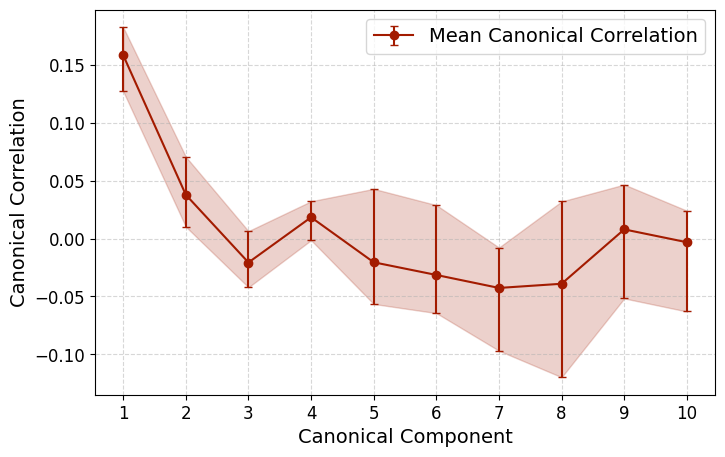

In [108]:
plot_cca_components_for_layer(cca_results, 'encoder.encoder.Encoder_0', data_key='cca_corrs_test')

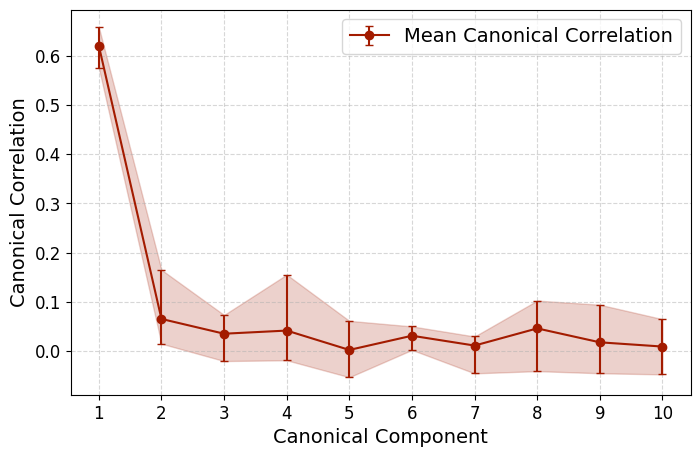

In [109]:
plot_cca_components_for_layer(cca_results, 'encoder.encoder.Encoder_2', data_key='cca_corrs_test')

### 